<a href="https://colab.research.google.com/github/FatimaMoqran/AZURE2/blob/master/coursMLFLOWdagshub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #🔧 1. Installation des dépendances
!pip install mlflow dagshub scikit-learn xgboost imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# 📁 2. Import des bibliothèques
import os
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from dagshub import dagshub_logger
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
import dagshub
dagshub.init(repo_owner='fatima.moqran', repo_name='my-first-repo', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=97f97a51-5ec2-4fb3-8941-1d216e0c5c66&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=721fe9aeb2be0c21ad57b1b76fc2b7344f6cfd35c63f7af96767b246e969832a




Accessing as fatima.moqran

Initialized MLflow to track repo "fatima.moqran/my-first-repo"

Repository fatima.moqran/my-first-repo initialized!

In [4]:
#enregistre dans un serveur distant sur daghshub
mlflow.set_tracking_uri("https://dagshub.com/fatima.moqran/my-first-repo.mlflow")


In [5]:
mlflow.set_experiment("anomaly_detection")


<Experiment: artifact_location='mlflow-artifacts:/c3bfe93681ff4ff59744809209f6ea12', creation_time=1749760964810, experiment_id='0', last_update_time=1749760964810, lifecycle_stage='active', name='anomaly_detection', tags={}>

In [6]:
 #Génération de données synthétiques avec déséquilibre
# Step 1: Create an imbalanced binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=8,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [8]:
# Define the model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
}

In [9]:
# Train the model
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       270
           1       0.62      0.50      0.56        30

    accuracy                           0.92       300
   macro avg       0.79      0.73      0.76       300
weighted avg       0.91      0.92      0.92       300



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [10]:
#on demande le report sous forme de dictionnaire pour le logger avec mlflow
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'0': {'precision': 0.9456521739130435,
  'recall': 0.9666666666666667,
  'f1-score': 0.9560439560439561,
  'support': 270.0},
 '1': {'precision': 0.625,
  'recall': 0.5,
  'f1-score': 0.5555555555555556,
  'support': 30.0},
 'accuracy': 0.92,
 'macro avg': {'precision': 0.7853260869565217,
  'recall': 0.7333333333333334,
  'f1-score': 0.7557997557997558,
  'support': 300.0},
 'weighted avg': {'precision': 0.9135869565217392,
  'recall': 0.92,
  'f1-score': 0.9159951159951161,
  'support': 300.0}}

In [11]:
import os
import joblib
import mlflow

# Créer le dossier s’il n'existe pas
os.makedirs("model", exist_ok=True)

# Sauvegarder le modèle avec joblib
joblib.dump(lr, "model/model.pkl")

['model/model.pkl']

In [12]:

    mlflow.log_params(params)
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score']
    })
    # Log manuel du modèle comme fichier
    mlflow.log_artifact("model/model.pkl", artifact_path="model")


print("✅ Suivi des expériences terminé. Visualisez-les sur votre interface DagsHub !")


✅ Suivi des expériences terminé. Visualisez-les sur votre interface DagsHub !


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
os.makedirs("figures", exist_ok=True)


In [14]:
# Générer la matrice
cm = confusion_matrix(y_test, y_pred)

# Créer une figure
plt.figure(figsize=(15, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matrice de confusion")
# Sauvegarder en image
plt.tight_layout()
plt.savefig("figures/confusion_matrix.png",bbox_inches='tight')
plt.close()# important pour éviter les doublons dans Colab



In [15]:


path = "figures/confusion_matrix.png"
print("Fichier existe ?", os.path.exists(path))
print("Taille du fichier (en Ko) :", os.path.getsize(path) / 1024 if os.path.exists(path) else "Non trouvé")


Fichier existe ? True
Taille du fichier (en Ko) : 29.2294921875


In [16]:
mlflow.log_artifact("figures/confusion_matrix.png", artifact_path="figures")
print("done")


done


In [17]:
if mlflow.active_run():
    mlflow.end_run()


🏃 View run dashing-midge-359 at: https://dagshub.com/fatima.moqran/my-first-repo.mlflow/#/experiments/0/runs/cf651d9c08364edc95ba283e9e90af08
🧪 View experiment at: https://dagshub.com/fatima.moqran/my-first-repo.mlflow/#/experiments/0


In [ ]:
import os
os.path.exists("figures/confusion_matrix.png")


True

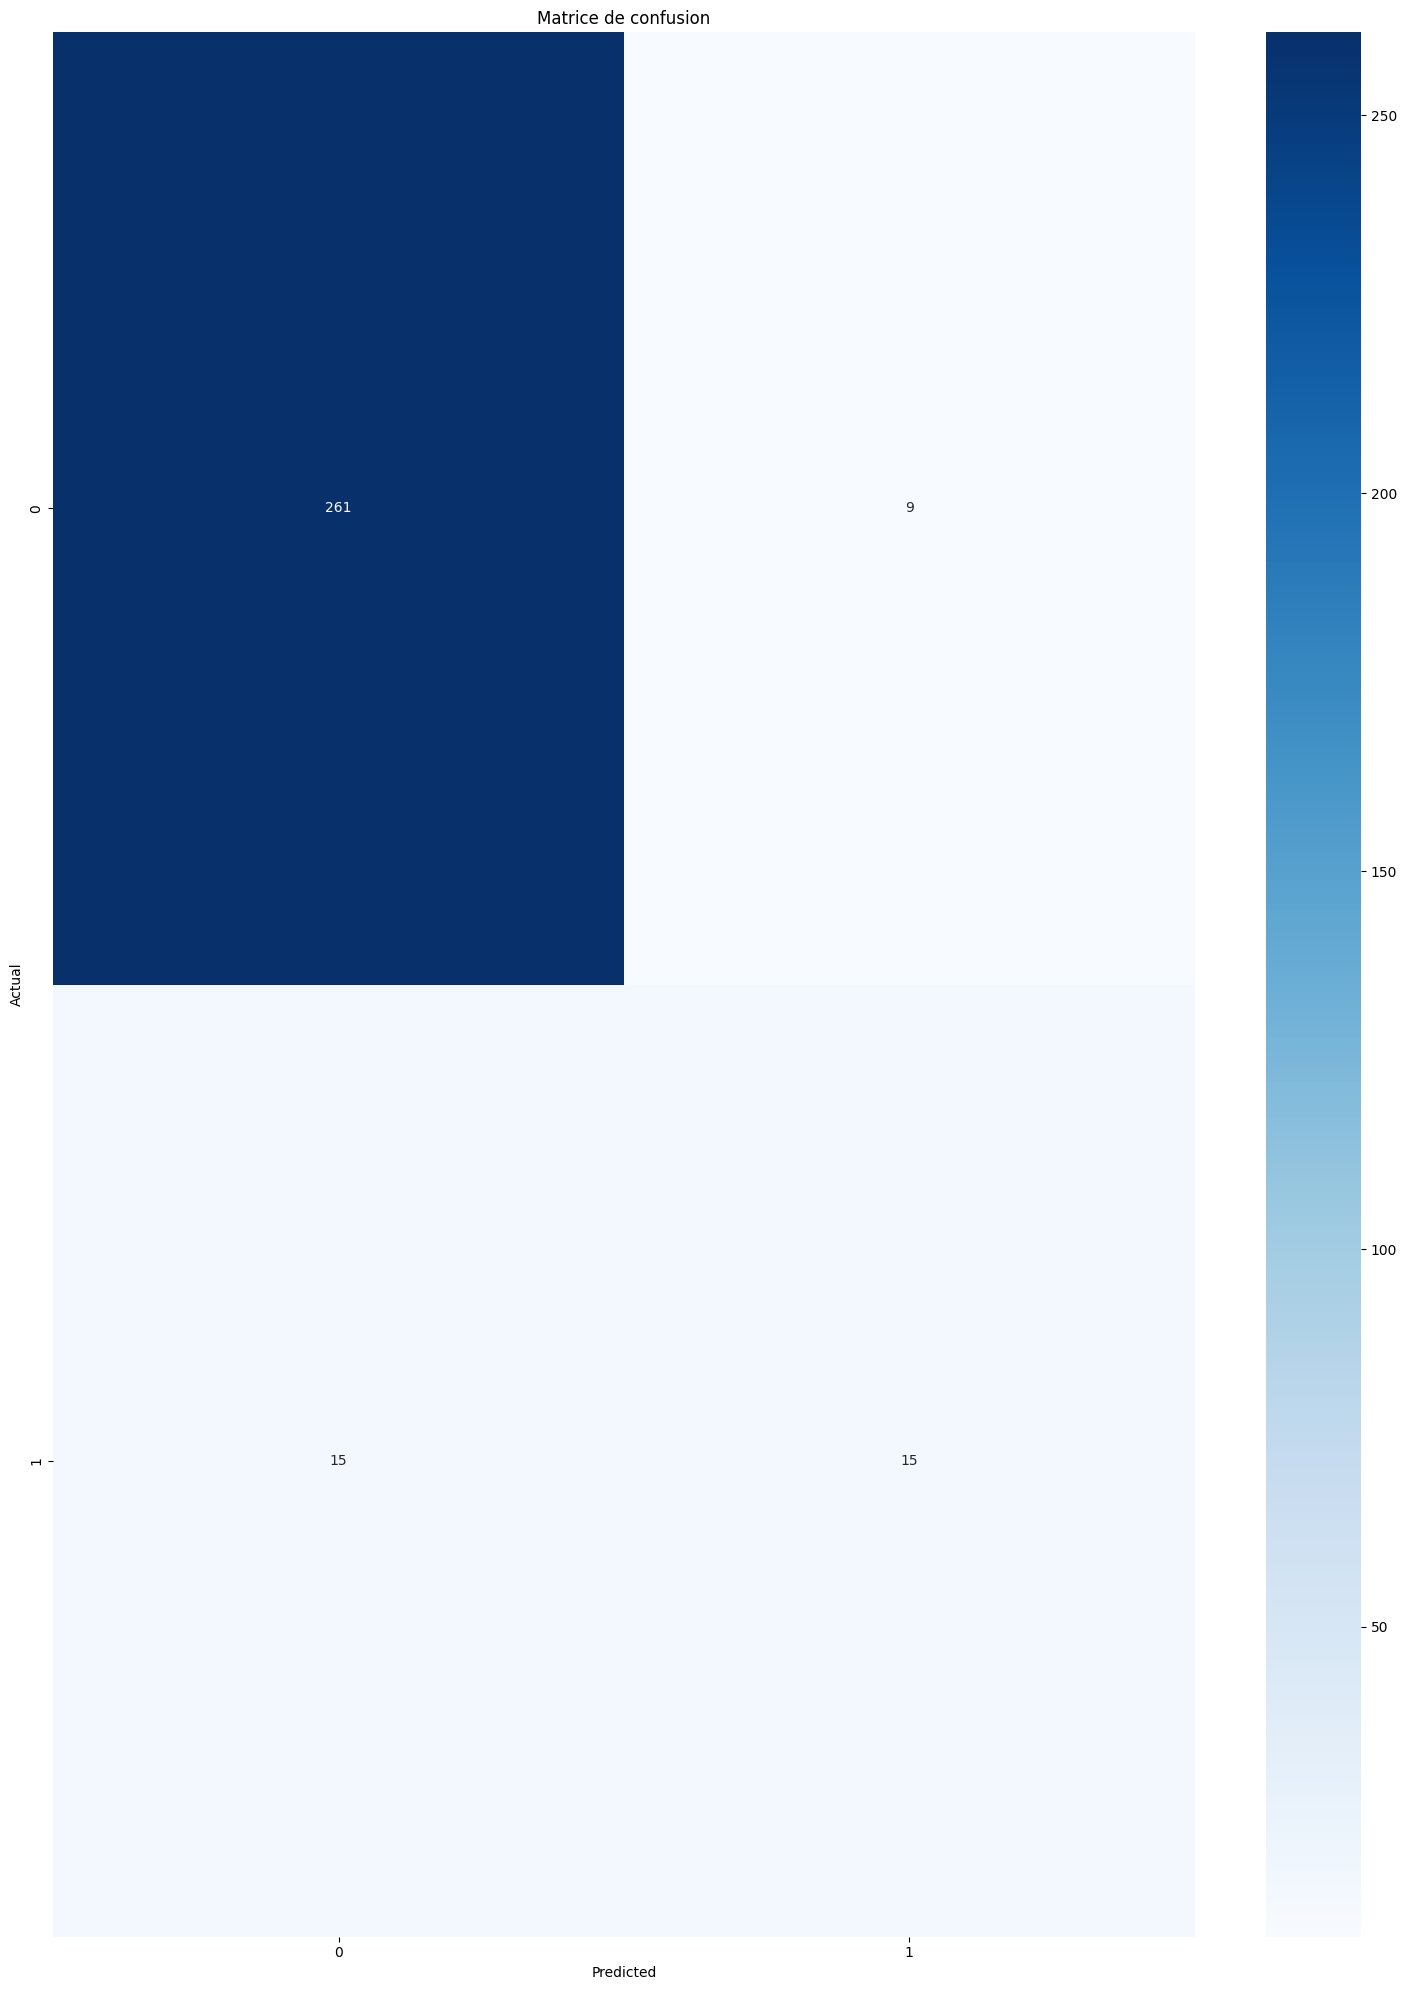

In [ ]:
from IPython.display import Image, display
display(Image(filename="figures/confusion_matrix.png"))
